In [2]:
#Importing necessary liberaries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)
#pd.set_option('max_columns', 30)
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
#reading the csv using pandas
data = pd.read_csv('cleaned_dataset.csv', sep=';')


In [4]:
#checking the data size
data.shape

(3472, 21)

In [5]:
#Double check that there is no missing data
data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [6]:
#checking the data type of each column
data.dtypes

LoanId                           int64
AmountDisbursed                  int64
Interest                         int64
LoanBalance                      int64
BorrowDate                      object
Product                         object
Branch                          object
ClearDate                       object
CustomerId                       int64
Gender                          object
LoanLimit                        int64
CreditScore                      int64
loan_repayment_txn_count         int64
loan_repayment_total_paid        int64
loan_repayment_first_payment    object
loan_repayment_last_payment     object
loan_overpayment                 int64
MissedInstalments                int64
Industry                        object
BusinessType                    object
YearEstablished                  int64
dtype: object

In [7]:
#changing loan repayment dates from type string into type date
data ['loan_repayment_first_payment']= pd.to_datetime(data['loan_repayment_first_payment'])
data ['loan_repayment_last_payment']= pd.to_datetime(data['loan_repayment_last_payment'])


C:\Users\amr_x\AppData\Local\Temp\ipykernel_21992\338593591.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data ['loan_repayment_first_payment']= pd.to_datetime(data['loan_repayment_first_payment'])
C:\Users\amr_x\AppData\Local\Temp\ipykernel_21992\338593591.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data ['loan_repayment_last_payment']= pd.to_datetime(data['loan_repayment_last_payment'])


In [10]:
#Renaming the (product) column
data.rename(columns = {'Product':'loan_period'})

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,loan_period,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,77500,29.11.2025,5 weeks credit ease,engineer,01.03.2026,1819,female,80000,3500,1,500,2025-11-29,2025-11-29,0,50,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,52500,28.11.2025,5 weeks credit ease,molo,01.02.2026,1818,female,96000,2500,1,1550,2025-11-28,2025-11-28,0,40,food & hospitality,retail shop,2019
2,949962,4000,1250,52500,26.11.2025,5 weeks credit ease,engineer,31.12.2025,1815,female,80000,3500,1,1350,2025-11-26,2025-11-26,0,40,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,52500,25.11.2025,5 weeks credit ease,molo,30.12.2025,1814,female,100000,1500,1,1000,2025-11-25,2025-11-25,0,40,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,52500,24.11.2025,5 weeks credit ease,molo,29.12.2025,1813,female,100000,1500,1,1550,2025-11-24,2025-11-24,0,40,business & information,bureau & publishing services,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,730377,15000,5600,0,28.09.2024,7 weeks credit ease,molo,30.09.2024,782,female,390000,2500,115,20600,2024-07-31,2024-09-28,0,0,"agriculture, forestry & fishing",green grocery (fruit/vegetables),2016
3468,690736,11000,4200,0,24.06.2024,7 weeks credit ease,molo,24.06.2024,782,male,110000,2500,140,15200,2024-06-20,2024-07-31,0,0,wholesale & retail trade,green grocery (fruit/vegetables),2019
3469,890687,10000,3850,0,10.05.2025,7 weeks credit ease,molo,10.06.2025,469,male,240000,2000,141,13850,2025-07-21,2025-09-08,0,70,food & hospitality,green grocery (fruit/vegetables),2019
3470,675955,9000,3500,0,05.06.2024,7 weeks credit ease,molo,14.05.2024,782,female,141000,2000,148,12500,2024-05-09,2024-06-20,0,0,food & hospitality,retail shop,2019


In [15]:
#Main numerical insights for (AmountDisbursed)
data['AmountDisbursed'].describe()



count     3472.000000
mean      8337.557604
std       4911.852870
min       3000.000000
25%       5000.000000
50%       7000.000000
75%      10000.000000
max      60000.000000
Name: AmountDisbursed, dtype: float64

In [16]:
#Main numerical insights for (Interest)
data['Interest'].describe()

count     3472.000000
mean      2845.420219
std       2354.941688
min       1000.000000
25%       1500.000000
50%       2000.000000
75%       3150.000000
max      25000.000000
Name: Interest, dtype: float64

In [18]:
#Main numerical insights for (Loanbalance)
data['LoanBalance'].describe()

count    3.472000e+03
mean     1.189000e+04
std      7.688411e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.669286e+06
Name: LoanBalance, dtype: float64

In [19]:
#Main numerical insights for (total repayments)
data['loan_repayment_total_paid'].describe()

count     3472.000000
mean     10403.112327
std       7115.551794
min         13.000000
25%       6500.000000
50%       9000.000000
75%      12750.000000
max      74000.000000
Name: loan_repayment_total_paid, dtype: float64

In [20]:
#Main numerical insights for (loan limit)
data['LoanLimit'].describe()

count    3.472000e+03
mean     1.418557e+05
std      1.025421e+05
min      2.400000e+04
25%      8.200000e+04
50%      1.120000e+05
75%      1.620000e+05
max      1.170000e+06
Name: LoanLimit, dtype: float64

In [ ]:
# A rough estimation of (business value) or (revenue) is needed

Text(0.5, 0, 'Interest')

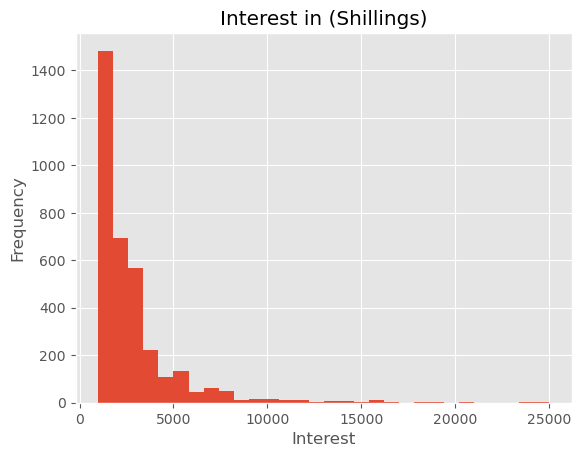

In [27]:
#Plotting Interests in Shillings to check its frequency histogram
ax=data['Interest'].plot(kind='hist'
                      , bins=30, 
                      title= 'Interest in (Shillings)')
ax.set_xlabel ('Interest')

Text(0.5, 0, 'Interest')

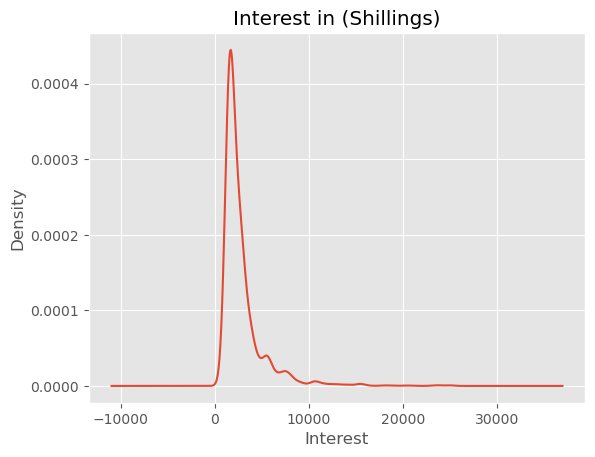

In [29]:
#Plotting Interests in Shillings to check its frequency KDE
ax=data['Interest'].plot(kind='kde'
                      , title= 'Interest in (Shillings)')
ax.set_xlabel ('Interest')

In [33]:
data['LoanLimit'].head(10).to_string()


'0     80000\n1     96000\n2     80000\n3    100000\n4    100000\n5     80000\n6     70000\n7     90000\n8    130000\n9    130000'

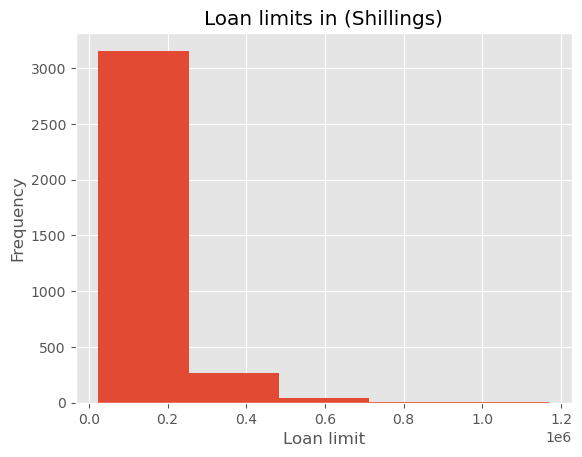

In [40]:
#Plotting (loan limit) to check its frequency histogram.
#The value here are scaled from the csv
ax=data['LoanLimit'].plot(kind='hist'
                      , bins=5, 
                      title= 'Loan limits in (Shillings)')

ax.set_xlabel ('Loan limit')
plt.show()

#I am trying to understand why they are scaled ? and what do the scaled values reflect?

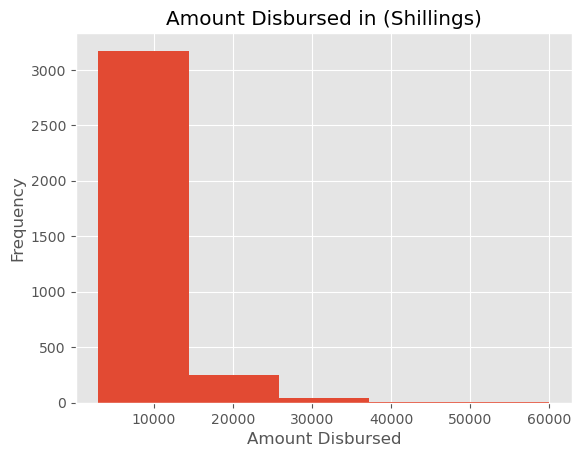

In [39]:
#Plotting (amount disbursed) to check its frequency histogram.

ax=data['AmountDisbursed'].plot(kind='hist'
                      , bins=5, 
                      title= 'Amount Disbursed in (Shillings)')

ax.set_xlabel ('Amount Disbursed')
plt.show()

<Axes: title={'center': ' Gender vs Interest'}, xlabel='Gender', ylabel='Interest'>

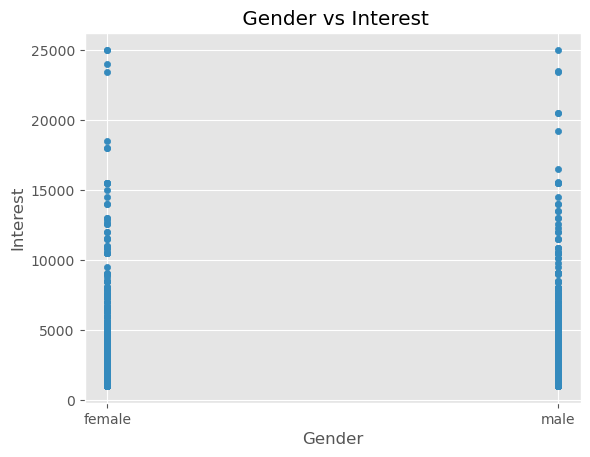

In [43]:
#sns.boxplot(x='Gender', y='Interest', data=data)
#plt.title('Interest by Gender')
#plt.show()


#Plotting interest vs Gender to check if the gender affects the amount of ineterst directly or indirectly.
data.plot (kind='scatter', x= 'Gender' , y = 'Interest' , title = ' Gender vs Interest')
# Most women tend to have interest lower than 10K.
# Most men have interest up to 15K
# Interest higher than 15K is rare for both genders

In [44]:
data['Gender'].value_counts()


Gender
male      1849
female    1623
Name: count, dtype: int64

<Axes: title={'center': ' missed instalments vs credit score'}, xlabel='MissedInstalments', ylabel='CreditScore'>

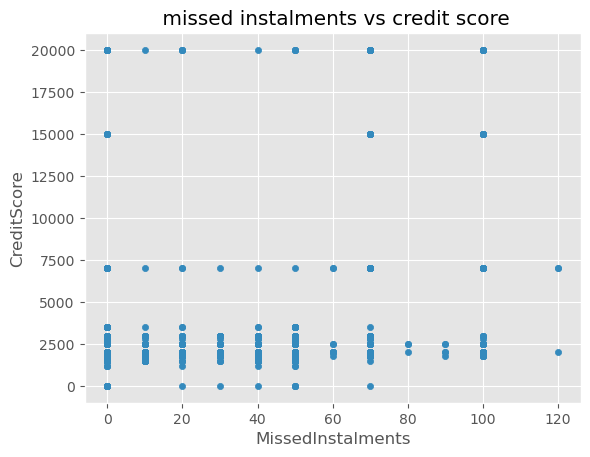

In [60]:
#Plotting credit score vs missed instalments 
data.plot (kind='scatter', x= 'MissedInstalments' , y = 'CreditScore' , title = ' missed instalments vs credit score')

#no clear corelation between credit score and missed instalments

<Axes: title={'center': ' missed instalments vs loan limit'}, xlabel='LoanLimit', ylabel='MissedInstalments'>

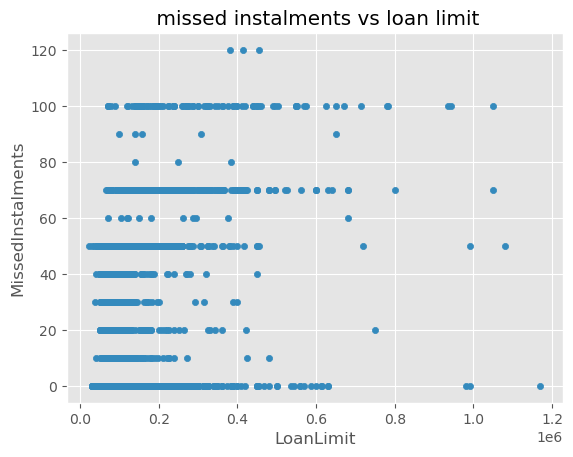

In [53]:
#Plotting interest vs Gender to check if the gender affects the amount of ineterst directly or indirectly.
data.plot (kind='scatter', x= 'LoanLimit' , y = 'MissedInstalments' , title = ' missed instalments vs loan limit')

In [65]:
data_corr= data[['MissedInstalments','LoanLimit','CreditScore','Interest','loan_repayment_total_paid','YearEstablished']].corr()

<Axes: >

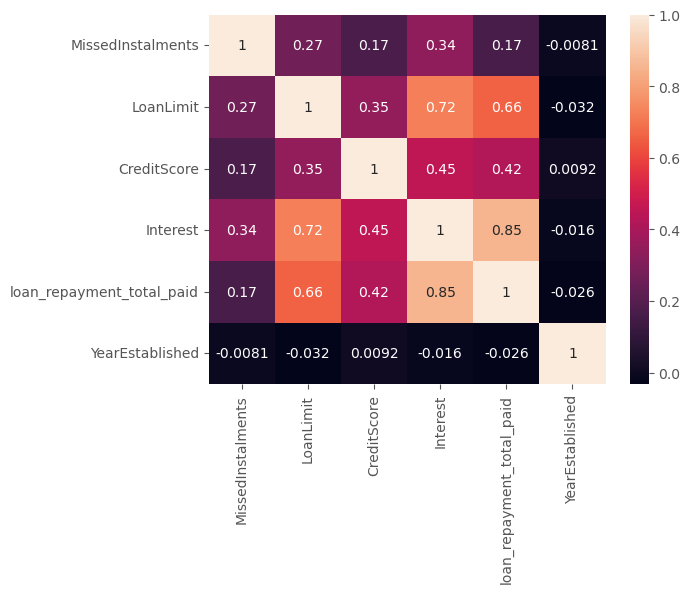

In [66]:
#Heat map for the features in data_corr
sns.heatmap(data_corr, annot=True)
# Total paid and interest are highly corelated, same for interest and credit score
# Year of establishment is irrelevant

In [67]:
#Feature Engineering
#1.This step is an estimation for the business profitability. (High or Low)
data['Repayment_Ratio'] = (
    data['loan_repayment_total_paid'] / data['AmountDisbursed']
)

In [93]:
data['Business_Performance'] = (data['Repayment_Ratio'] >= 1).astype(int)

In [94]:
data[['AmountDisbursed', 'loan_repayment_total_paid', 'Repayment_Ratio', 'Business_Performance']].head(10)


,AmountDisbursed,loan_repayment_total_paid,Repayment_Ratio,Business_Performance
0,6000,500,0.083333,0
1,4000,1550,0.387500,0
2,4000,1350,0.337500,0
3,4000,1000,0.250000,0
4,4000,1550,0.387500,0
5,4000,1550,0.387500,0
6,4000,1050,0.262500,0
7,4000,1050,0.262500,0
8,4000,2600,0.650000,0
9,4000,1550,0.387500,0


In [95]:
data['Business_Performance'].value_counts()


Business_Performance
1    2991
0     481
Name: count, dtype: int64

In [109]:
#Financial Stress / Risk Indicator feature
# basically if the customer missed more than 3 payments, then this refers to a high potential risk.
data['Financial_Stress'] = (data['MissedInstalments'] > 30).astype(int)



In [110]:
data['Financial_Stress'].value_counts()


Financial_Stress
0    2069
1    1403
Name: count, dtype: int64